In [178]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [179]:
import numpy as np
import pandas as pd

In [180]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [181]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import sqlite3
## conn = sqlite3.connect("../Resources/hawaii.sqlite") -- delete this line? --

In [182]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [183]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [184]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [185]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [186]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [187]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date

# Calculate the date 1 year ago from the last data point in the database
# Date time object
year = int(last_date[0:4])
year
month = int(last_date[5:7])
month
day = int(last_date[8:10])
day

prev_year = dt.date(year, month, day) - dt.timedelta(days = 365)
prev_year

# Perform a query to retrieve the date and precipitation scores
precipt_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=prev_year).all()
precipt_results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [193]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipt_results_df = pd.DataFrame(precipt_results)
precipt_results_df.set_index('date', inplace=True)
precipt_results_df

# Sort the dataframe by date
precipt_results_df.sort_values(by=['date'], inplace=True, ascending=True)
precipt_results_df.head(2021)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


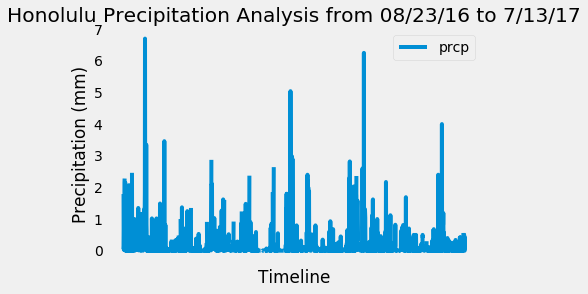

<Figure size 432x288 with 0 Axes>

In [201]:
# Use Pandas Plotting with Matplotlib to plot the data

# Create a bar chart based upon the above data
plt.figure
precipt_results_df.plot()

# Set a grid on the plot
plt.grid()

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# Give the chart a title, x label, and y label
plt.title("Honolulu Precipitation Analysis from 08/23/16 to 7/13/17")
plt.xlabel("Timeline")
plt.ylabel("Precipitation (mm)")

# Save an image of the chart and print it to the screen
plt.show()
plt.savefig("Honolulu_precipitation.png")

In [ ]:
# DO NOT ENTER CODE HERE (provided output below)

![precipitation](Images/precipitation.png)

In [202]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipt_results_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [ ]:
# DO NOT ENTER CODE HERE (provided output below)

![describe](Images/describe.png)

Station Analysis

In [203]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.station)).all()
stations

[(9)]

In [204]:
stations[0]

(9)

In [205]:
stations[0][0]
print("There are {} stations.".format(stations[0][0]))

There are 9 stations.


In [12]:
# DO NOT ENTER CODE HERE (provided output below)

[(9)]

In [206]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [207]:
busiest_station = station[0][0]
print("The busiest station was", busiest_station,"with", station[0][1], "weather observations.")

The busiest station was USC00519281 with 2772 weather observations.


In [13]:
# DO NOT ENTER CODE HERE (provided output below)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [208]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature most active station?
# HINT: func.min, func.max, func.avg

USC00519281_result = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
USC00519281_result

[(54.0, 85.0, 71.66378066378067)]

In [209]:
USC00519281_LT_result = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
USC00519281_LT_result[0][0]
print("Station USC00519281 had low temp {} degrees F.".format(USC00519281_LT_result[0][0]))

Station USC00519281 had low temp 54.0 degrees F.


In [210]:
USC00519281_HT_result = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()                                  
USC00519281_HT_result
print("Station USC00519281 had high temp {} degrees F.".format(USC00519281_HT_result[0][0]))

Station USC00519281 had high temp 85.0 degrees F.


In [211]:
USC00519281_AT_result = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
USC00519281_AT_result
print("Station USC00519281 had average temp {} degrees F.".format(USC00519281_AT_result[0][0]))

Station USC00519281 had average temp 71.66378066378067 degrees F.


In [14]:
# DO NOT ENTER CODE HERE (provided output below)

[(54.0, 85.0, 71.66378066378067)]

In [212]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station.

temp_last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
temp_last_date

# Calculate the date 1 year ago from the last data point in the database
# Date time object
year = int(last_date[0:4])
year
month = int(last_date[5:7])
month
day = int(last_date[8:10])
day

temp_year_ago = dt.date(year, month, day) - dt.timedelta(days = 365)
temp_year_ago

temp_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=prev_year).all()
temp_results

[('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

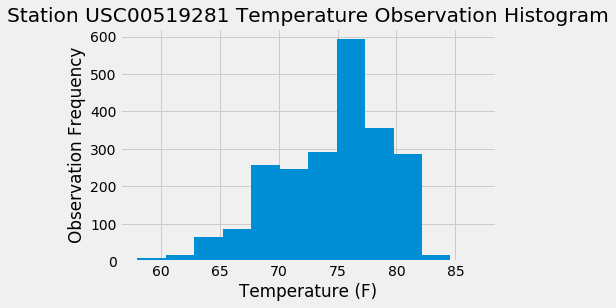

In [213]:
# Plot the results as a histogram.
temp_graph = session.query(Measurement.tobs).filter(Measurement.date>=prev_year).all()
temp_graph

plt.hist((*zip(*temp_graph)), bins=12)  # arguments are passed to np.histogram
plt.title("Station USC00519281 Temperature Observation Histogram")
plt.xlabel('Temperature (F)')
plt.ylabel('Observation Frequency')
plt.show()


In [1]:
# DO NOT ENTER CODE HERE (provided output below)

![precipitation](Images/station-histogram.png)

In [215]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-08-23', '2017-07-13'))

[(58.0, 74.16444444444444, 87.0)]


In [235]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_arrive = dt.date(2016, 8, 23)
trip_leave = dt.date(2017, 7, 13)
last_year = dt.timedelta(days=365)
temp_data_last_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
temp_data_last_year[0]

(56.0, 74.0014367816092, 86.0)

In [255]:
Tmin = temp_data_last_year[0][0]
Tmin
print(Tmin, "degrees (F) was the previous year's minimum temperature.")

56.0 degrees (F) was the previous year's minimum temperature.


In [256]:
Tavg = temp_data_last_year[0][1]
Tavg
print(Tavg, "degrees (F) was the previous year's average temperature.")

74.0014367816092 degrees (F) was the previous year's average temperature.


In [257]:
Tmax = temp_data_last_year[0][2]
Tmax
print(Tmax, "degrees (F) was the previous year's maximum temperature.")

86.0 degrees (F) was the previous year's maximum temperature.


In [17]:
# DO NOT ENTER CODE HERE (provided output below)

62.0 68.36585365853658 74.0


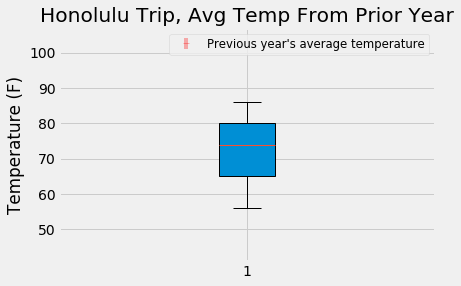

In [294]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
x = range(len(temp_data_last_year))
ax.boxplot(temp_avg_lst_year, patch_artist=True)
ax.set_title("Honolulu Trip, Avg Temp From Prior Year")
ax.set_ylabel("Temperature (F)")
ax.errorbar(x, Tavg, yerr=(Tmax-Tmin), fmt="_", alpha=0.3, color="r", label="Previous year's average temperature")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

<IPython.core.display.Javascript object>


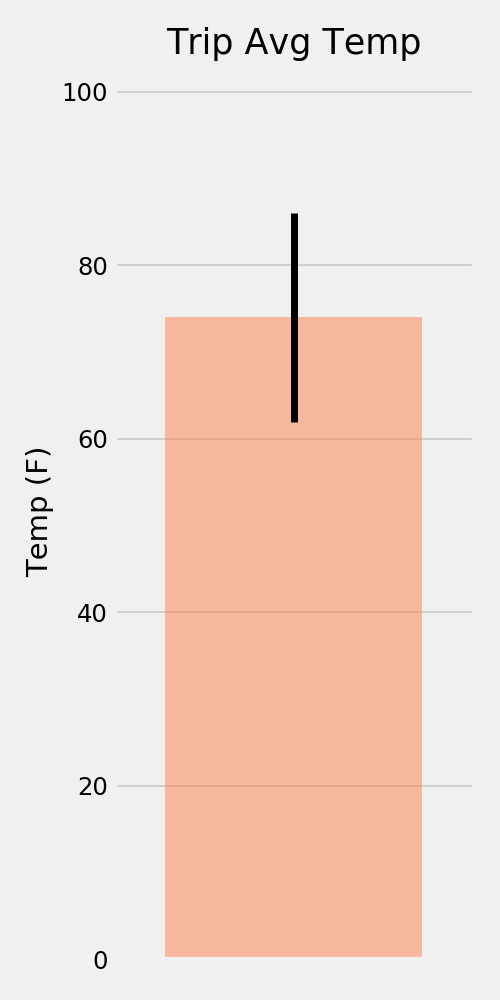

In [18]:
# DO NOT ENTER CODE HERE (provided output below)

In [314]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
precipt_station = session.query(Measurement.station, func.sum(Measurement.prcp)).filter(Measurement.date>=prev_year).group_by(Measurement.station).all()
precipt_station


[('USC00513117', 48.510000000000026),
 ('USC00514830', 33.239999999999995),
 ('USC00516128', 147.81000000000006),
 ('USC00517948', 4.59),
 ('USC00519281', 70.03000000000003),
 ('USC00519397', 16.089999999999986),
 ('USC00519523', 38.01)]

In [19]:
# DO NOT ENTER CODE HERE (provided output below)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [276]:
## [END HOMEWORK] ##

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [20]:
# DO NOT ENTER CODE HERE (provided output below)

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [21]:
# DO NOT ENTER CODE HERE (provided output below)

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [22]:
# DO NOT ENTER CODE HERE (provided output below)

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

<IPython.core.display.Javascript object>


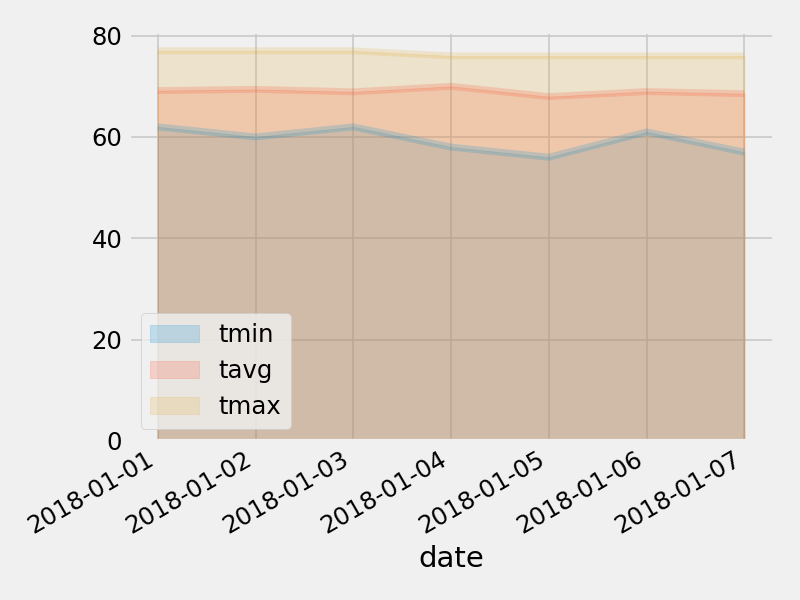

In [23]:
# DO NOT ENTER CODE HERE (provided output below)